<a href="https://colab.research.google.com/github/caroheymes/Jedha_nlp_disasters_tweet/blob/master/tweet_modeling_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet - Real or Not? NLP with Disaster Tweets - models training**

## Project description 

* Competition - https://www.kaggle.com/c/nlp-getting-started

# Loading librairies & data

In [ ]:
!python -m spacy download en_core_web_sm -q

In [2]:
!pip install spacy -q

In [ ]:
!pip install unidecode -q

In [ ]:
!pip install simpletransformers -q

In [6]:
#Packages

import numpy as np
import pandas as pd
import csv
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import requests
import json
import collections

# Text modules
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.corpus import wordnet as wnl
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import collections

# Text cleaning
import unidecode
import string
import re
import html

#Figures

import matplotlib.pyplot as plt


#Deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPool1D

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir('/content/')

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/disaster tweet/nlp-getting-started/train.csv').fillna('')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Nlp tool box

In [11]:
#Stopwords list
# A robust custom stopword list with many sources

# nltk corpus
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_corpus = set(stopwords.words("english"))
print('nltk_corpus : ',  len(nltk_corpus))

# spacy corpus
from spacy.lang.en.stop_words import STOP_WORDS
spacy_corpus = STOP_WORDS
print('spacy_corpus : ', len(spacy_corpus))

# sklearn corpus
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_corpus
print('sklearn_corpus : ', len(sklearn_corpus))

# gensim corpus
gensim_corpus = gensim.parsing.preprocessing.STOPWORDS
print('gensim_corpus : ', len(gensim_corpus))

# Webconf corpus
# cf https://www.webconfs.com/stop-words.php
webconf_corpus = {"able", "about", "above", "abroad", "according", "accordingly", "across", "actually", "adj", "after", "afterwards", "again", "against", "ago", "ahead", "ain't", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "amid", "amidst", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "are", "aren't", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "back", "backward", "backwards", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "both", "brief", "but", "by", "came", "can", "cannot", "cant", "can't", "caption", "cause", "causes", "certain", "certainly", "changes", "clearly", "c'mon", "co", "co.", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "c's", "currently", "dare", "daren't", "definitely", "described", "despite", "did", "didn't", "different", "directly", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "during", "each", "edu", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "entirely", "especially", "et", "etc", "even", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "fairly", "far", "farther", "few", "fewer", "fifth", "first", "five", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forward", "found", "four", "from", "further", "furthermore", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "had", "hadn't", "half", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "here's", "hereupon", "hers", "herself", "he's", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "hundred", "i'd", "ie", "if", "ignored", "i'll", "i'm", "immediate", "in", "inasmuch", "inc", "inc.", "indeed", "indicate", "indicated", "indicates", "inner", "inside", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "its", "it's", "itself", "i've", "just", "k", "keep", "keeps", "kept", "know", "known", "knows", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked", "likely", "likewise", "little", "look", "looking", "looks", "low", "lower", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mayn't", "me", "mean", "meantime", "meanwhile", "merely", "might", "mightn't", "mine", "minus", "miss", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "must", "mustn't", "my", "myself", "name", "namely", "nd", "near", "nearly", "necessary", "need", "needn't", "needs", "neither", "never", "neverf", "neverless", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "no-one", "nor", "normally", "not", "nothing", "notwithstanding", "novel", "now", "nowhere", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "ones", "one's", "only", "onto", "opposite", "or", "other", "others", "otherwise", "ought", "oughtn't", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably", "provided", "provides", "que", "quite", "qv", "rather", "rd", "re", "really", "reasonably", "recent", "recently", "regarding", "regardless", "regards", "relatively", "respectively", "right", "round", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "since", "six", "so", "some", "somebody", "someday", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "there'd", "therefore", "therein", "there'll", "there're", "theres", "there's", "thereupon", "there've", "these", "they", "they'd", "they'll", "they're", "they've", "thing", "things", "think", "third", "thirty", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "till", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "t's", "twice", "two", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "upwards", "us", "use", "used", "useful", "uses", "using", "usually", "v", "value", "various", "versus", "very", "via", "viz", "vs", "want", "wants", "was", "wasn't", "way", "we", "we'd", "welcome", "well", "we'll", "went", "were", "we're", "weren't", "we've", "what", "whatever", "what'll", "what's", "what've", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "where's", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whither", "who", "who'd", "whoever", "whole", "who'll", "whom", "whomever", "who's", "whose", "why", "will", "willing", "wish", "with", "within", "without", "wonder", "won't", "would", "wouldn't", "yes", "yet", "you", "you'd", "you'll", "your", "you're", "yours", "yourself", "yourselves", "you've", "zero"}
print('webconf_corpus : ', len(webconf_corpus))

#build custom stop words list and dedup
custom = [w for w in nltk_corpus | spacy_corpus | sklearn_corpus | gensim_corpus | webconf_corpus]
custom = list(set(custom))
print('custom : ', len(custom))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
nltk_corpus :  179
spacy_corpus :  326
sklearn_corpus :  318
gensim_corpus :  337
webconf_corpus :  635
custom :  732


In [12]:
#Function to tokenize tweets

#Cleaning functions


def basic_clean(tweet):
  tweet = tweet.lower()
  tweet = unidecode.unidecode(tweet)
  tweet = html.unescape(tweet)
  tweet = tweet.replace("'"," ")
  tweet = re.sub(r'<.*?>', '', tweet)         # remove html tags
  tweet = re.sub('VIDEO:', '', tweet)         # remove 'VIDEO:' from start of tweet
  tweet = re.sub('AUDIO:', '', tweet)         # remove 'AUDIO:' from start of tweet
  tweet = re.sub(r'https?://\S+', '', tweet)  # Remove link
  tweet = re.sub(r'[0-9,.]+', '', tweet)      # Remove digits
  tweet = re.sub(r'@\S+', '', tweet)          # remove tweeted at
  tweet = re.sub(r'\brt\b', '', tweet).strip()# Remove RT
  tweet = re.sub('\n',' ', tweet)            # Remove line breaks
  tweet = re.sub('\s+', ' ', tweet).strip()   # Remove leading, trailing, and extra spaces
  tweet = re.sub("(.)\\1{3,}", "\\1", tweet)  # Remove duplicate caracters in strings
  tweet = ' '.join(nltk.RegexpTokenizer(r"\w+").tokenize(tweet)) #remove punctuation
  
  return tweet

def de_abbreviate(tweet):# cf https://github.com/bicachu/topic-modeling-health-tweets/blob/master/notebooks/clean_tokenizer.py
  abbreviations = json.load(open('/content/drive/MyDrive/disaster tweet/abbreviations.json'))
  if isinstance(tweet, str):
    for key in abbreviations:
      value = abbreviations[key]
      raw_text = r'\b' + key + r'\b'
      x = re.sub(raw_text, value, tweet)	
    return tweet
  else:
    return tweet

def remove_stopwords(tweet):
	return ' '.join([word for word in tweet.split() if word not in custom])
 
def lemmatize(token):
  return WordNetLemmatizer().lemmatize(token, pos='n')

def process_cleaning(tweet):
  """custom function to clean tweets"""
  tweet = de_abbreviate(tweet) #In fiest because of "'"
  tweet = basic_clean(tweet)
  tweet = remove_stopwords(tweet)
  tweet =' '.join([lemmatize(token) for token in tweet.split() if len(token) > 2])
  return tweet

for tweet in df.text.values[:5]:
  print()
  print(tweet)
  print(process_cleaning(tweet))
  


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
deed reason earthquake allah forgive

Forest fire near La Ronge Sask. Canada
forest ronge sask canada

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
resident asked shelter place notified officer evacuation shelter place order expected

13,000 people receive #wildfires evacuation orders in California 
people receive wildfire evacuation order california

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
photo ruby alaska smoke wildfire pours school


# Data modeling

In [13]:
df = pd.read_csv('/content/drive/MyDrive/disaster tweet/nlp-getting-started/train.csv').fillna('')

In [14]:
# Drop useless columns
df = df[['target', 'text']]
df.rename(columns={'target' : 'labels'}, inplace=True)
df['token'] = [process_cleaning(tweet) for tweet in df.text if isinstance(tweet, str)]
df.sample(5)

,labels,text,token
6448,1,The number of security officials killed by PKK...,number security official killed pkk terror att...
1237,1,Ton of smoke coming out of one of the new apar...,ton smoke coming apartment building ross aubur...
6761,0,Heather Night and Ava Sparxxx enjoy a wild tee...,heather night ava sparxxx enjoy wild teen thre...
5621,1,./.....hmm 12000 Nigerian refugees repatriated...,hmm nigerian refugee repatriated cameroon
4051,1,The spread of Conflict #PalmOil has sparked an...,spread conflict palmoil sparked increase fire ...


In [15]:
#No empty records
df = df[df.token != '']

In [15]:
df.labels.value_counts(normalize=True) #for class_weight

0    0.56983
1    0.43017
Name: labels, dtype: float64

In [16]:
# Define the vocabulary size and number of words in a sequence
vocab_size = len(list(set(' '.join([x for x in df.token.values]).split())))
print('vocab_size : ', vocab_size)

# length of the longest tokenized tweet : 
sequence_length = max([len(x.split()) for x in df.token.values])
print('sequence_length : ', sequence_length)

vocab_size :  12515
sequence_length :  21


In [17]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(df.token)
df["token_encoded"] = tokenizer.texts_to_sequences(df.token)
df = df[df.token != '']
df.sample(5)



,labels,text,token,token_encoded
6381,1,11 soldiers killed in ISIS suicide bomb in air...,soldier killed isi suicide bomb air base east ...,"[916, 33, 333, 20, 19, 172, 2332, 581, 5133, 1..."
7464,1,Crawling in my skin\nThese wounds they will no...,crawling skin wound hea,"[12434, 1689, 241, 12435]"
1566,0,I regress and I slip and I fall off that cliff,regress slip fall cliff,"[6716, 1750, 107, 249]"
1971,0,1970 Mercury Cyclone GT Hood Moulding Very NIC...,mercury cyclone hood moulding nice core cobra jet,"[3121, 383, 3537, 4203, 834, 4204, 3122, 1505]"
5892,0,Who need friends when there's booze and Darude...,friend booze darude sandstorm,"[205, 10916, 2197, 257]"


In [18]:
# lookup for the words and indices
top_10_tokens = [{key, value} for key, value in tokenizer.index_word.items() if int(key) < 11]
top_10_tokens

[{1, 'people'},
 {2, 'news'},
 {3, 'time'},
 {4, 'year'},
 {5, 'video'},
 {6, 'disaster'},
 {7, 'emergency'},
 {8, 'body'},
 {9, 'day'},
 {10, 'home'}]

In [19]:
#Padding
df_pad = tf.keras.preprocessing.sequence.pad_sequences(df.token_encoded, maxlen=sequence_length, padding="post")
df_pad

array([[3514,  351,  102, ...,    0,    0,    0],
       [  62, 5246, 5247, ...,    0,    0,    0],
       [1260, 1159, 1417, ...,    0,    0,    0],
       ...,
       [ 488,  347, 1148, ...,    0,    0,    0],
       [  11,  804, 1726, ...,    0,    0,    0],
       [  80,   10,  350, ...,    0,    0,    0]], dtype=int32)

In [20]:
# Build a tensorflow dataset containing the encoded texts and the labels.
full_df = tf.data.Dataset.from_tensor_slices((df_pad, df.labels))

#train test split
TAKE_SIZE = int(0.8*df.shape[0])
batch_size = 64

train = full_df.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train = train.batch(batch_size)

test = full_df.skip(TAKE_SIZE)
test = test.batch(batch_size)


In [21]:
# Let's look at one batch 
for e in train.take(1):
  print(e)

(<tf.Tensor: shape=(64, 21), dtype=int32, numpy=
array([[   1,  401,  497, ...,    0,    0,    0],
       [ 691,    5,  793, ...,    0,    0,    0],
       [  52,  146,  470, ...,    0,    0,    0],
       ...,
       [5578,  339, 5579, ...,    0,    0,    0],
       [ 277,    0,    0, ...,    0,    0,    0],
       [1032, 4648,  971, ...,    0,    0,    0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])>)


# First Sequential model

In [22]:
os.chdir('/content/drive/MyDrive/disaster tweet/best_model_history')

In [23]:
#  Create a model in order to train an embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
n_dense = 64

model = Sequential()
model.add(Embedding(vocab_size +1, batch_size, name="embedding", embeddings_initializer='lecun_uniform'))
# the input dim needs to be equal to the size of the vocabulary + 1 (because of the zero padding)
model.add(tf.keras.layers.Dropout(0.2))
model.add(GlobalAveragePooling1D()) # this will pick the average for every word in the sentence along each dimension of the representation space.
model.add(tf.keras.layers.Dropout(0.2))

# Bidirectional LSTM layer
model.add(tf.keras.layers.Reshape(( 1,64)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(16, return_sequences=False)) 
model.add(tf.keras.layers.Dropout(0.2))

# model.add(Dense(64,activation="relu"))
# model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,"relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()



opt = tf.keras.optimizers.Adam(learning_rate= 0.0005)
thresholds = 0.5
METRICS = [
      tf.keras.metrics.TruePositives(name='tp',thresholds=thresholds),
      tf.keras.metrics.FalsePositives(name='fp',thresholds=thresholds),
      tf.keras.metrics.TrueNegatives(name='tn',thresholds=thresholds),
      tf.keras.metrics.FalseNegatives(name='fn',thresholds=thresholds),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      
]
model.compile(optimizer=opt,
              loss="binary_crossentropy",
               metrics = METRICS)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          801024    
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 1, 64)            24832     
 l)                                                     

In [24]:
#Taking weight class in account
df.labels.value_counts()/(df.shape[0])
class_weight = {0:     0.56983,
                1:    0.43017}

#Define early stopping
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0.001,
                          patience = 25,
                          verbose = 1,
                          restore_best_weights = True)
#Define Checkpoint
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/disaster tweet/best_model_history'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('best_model.h5',
    # filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    restore_best_weights = True)


my_callbacks = [
    earlystop,
    model_checkpoint_callback

]
# Training the model
history = model.fit(train,
          epochs=30, 
          validation_data=test,
          class_weight = class_weight,
          callbacks=my_callbacks)

Epoch 1/30
95/95 [==============================] - 13s 33ms/step - loss: 0.3400 - tp: 7.0000 - fp: 11.0000 - tn: 3506.0000 - fn: 2553.0000 - accuracy: 0.5781 - precision: 0.3889 - recall: 0.0027 - val_loss: 0.7138 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 812.0000 - val_fn: 708.0000 - val_accuracy: 0.5342 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
95/95 [==============================] - 1s 9ms/step - loss: 0.3218 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3517.0000 - fn: 2560.0000 - accuracy: 0.5787 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6897 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 812.0000 - val_fn: 708.0000 - val_accuracy: 0.5342 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
95/95 [==============================] - 1s 10ms/step - loss: 0.2820 - tp: 285.0000 - fp: 9.0000 - tn: 3508.0000 - fn: 2275.0000 - accuracy: 0.6242 - precision: 0.9694 - recall: 0.1113 - val_loss: 0.5916 - val_tp: 252.0000 - val_fp: 1

In [27]:
model.save_weights('best_weights.h5')

In [28]:
h = pd.DataFrame.from_dict(history.history)
h.to_csv('history_model1.csv')

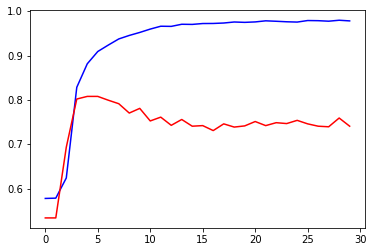

In [29]:
# Visualization of the training on the accuracy 
h.accuracy.plot(color="b")
h.val_accuracy.plot(color="r")

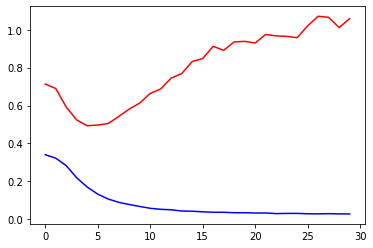

In [126]:
# Visualization of the training on the loss 
h.loss.plot(color="b")
h.val_loss.plot(color="r")

In [136]:
result = pd.read_csv('/content/drive/MyDrive/disaster tweet/best_model_history/history_model1.csv')
# Best params on 5th epoch
result.iloc[5]

Unnamed: 0          5.000000
loss                0.131799
tp               2210.000000
fp                203.000000
tn               3314.000000
fn                350.000000
accuracy            0.909001
precision           0.915872
recall              0.863281
val_loss            0.496860
val_tp            522.000000
val_fp            106.000000
val_tn            706.000000
val_fn            186.000000
val_accuracy        0.807895
val_precision       0.831210
val_recall          0.737288
Name: 5, dtype: float64

In [135]:
# Best params on 5th epoch
print('accuracy : ',result.iloc[5].val_accuracy )
precision = result.iloc[5].val_precision
print('precision : ',result.iloc[5].val_precision)
recall = result.iloc[5].val_recall
print('recall :', result.iloc[5].val_recall)
print('f1_score : ',2*(precision*recall) / (precision+recall))


accuracy :  0.8078947663307191
precision :  0.8312101960182191
recall : 0.7372881174087524
f1_score :  0.7814371177157998


In [ ]:
accuracy = (result['tp'] + result['tn']) / (result['tp'] + result['tn'] + result['fp'] + result['fn'])
print('accuracy : ',accuracy )
precision = result['tp'] / (result['tp'] + result['fp'])
print('precision : ', precision)
recall = result['tp']/ (result['tp'] + result['fn'])
print('recall :', recall)
f1_score = 2*(precision*recall) / (precision+recall)
print('f1_score : ',f1_score)

In [114]:

bestmodel = load_model('/content/drive/MyDrive/disaster tweet/best_model_history/best_model.h5', compile = True)

In [125]:
predictions, raw_outputs = model.predict(pd.read_csv('/content/drive/MyDrive/disaster tweet/nlp-getting-started/test.csv').text.values[1])
predictions.mean().astype(int)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0

# Transformers model

In [ ]:
!pip install simpletransformers -q

In [60]:
df2 = df[['token', 'labels']].copy()
df2.rename(columns={'target' : 'labels'}, inplace=True)

In [61]:
df2 = df2.sample(len(df))

In [62]:
train_df = df2[:int(.70*len(df2))]
eval_df = df2[int(.70*len(df2)): int(.9*len(df))]
test_df = df2[int(.9*len(df2)):]

In [63]:
train_df.shape, eval_df.shape, test_df.shape

((5317, 2), (1520, 2), (760, 2))

In [64]:

from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3, train_batch_size=32)

# Create a ClassificationModel
model = ClassificationModel(
    "bertweet", "vinai/bertweet-base", args=model_args, use_cuda=True
)

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: 

In [65]:
train_args = {
    "num_train_epochs": 1,
    "learning_rate": 1e-4,
    'overwrite_output_dir': True
}

# Train the model
model.train_model(train_df, args = train_args)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/5317 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bertweet_128_2_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/167 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bertweet model complete. Saved to outputs/.


(167, 0.49481431426045425)

In [66]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1520 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bertweet_128_2_2


Running Evaluation:   0%|          | 0/190 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.6021788109036298, 'tp': 473, 'tn': 749, 'fp': 98, 'fn': 200, 'auroc': 0.8620145220172235, 'auprc': 0.8632109450337208, 'eval_loss': 0.44188641999897205}


In [67]:
result

{'auprc': 0.8632109450337208,
 'auroc': 0.8620145220172235,
 'eval_loss': 0.44188641999897205,
 'fn': 200,
 'fp': 98,
 'mcc': 0.6021788109036298,
 'tn': 749,
 'tp': 473}

In [68]:

accuracy = (result['tp'] + result['tn']) / (result['tp'] + result['tn'] + result['fp'] + result['fn'])
print('accuracy : ',accuracy )
precision = result['tp'] / (result['tp'] + result['fp'])
print('precision : ', precision)
recall = result['tp']/ (result['tp'] + result['fn'])
print('recall :', recall)
f1_score = 2*(precision*recall) / (precision+recall)
print('f1_score : ',f1_score)

accuracy :  0.8039473684210526
precision :  0.8283712784588442
recall : 0.7028231797919762
f1_score :  0.7604501607717042


In [69]:
df2.iloc[0]['labels']

0

In [73]:
predictions, raw_outputs = model.predict(df2.iloc[0]['token'])
predictions.mean().round()

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0.0

# Third model with Google Sentence Encoder

In [4]:

# cf https://github.com/MahalavanyaSriram/Natural-Language-Processing-with-Disaster-Tweets/blob/master/Jupyter%20Notebooks/google-universal-sentence-encoder.ipynb
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.callbacks import ModelCheckpoint

module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'
embed = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

def build_model(embed):
    model = Sequential([
        Input(shape=[], dtype=tf.string),
        embed,
        Dense(1, activation='sigmoid')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate= 1e-5)
    model.compile(optimizer=opt,
              loss="binary_crossentropy", metrics=['accuracy'])
    return model

model3 = build_model(embed)

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_embedding (KerasLayer)  (None, 512)               147354880 
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 147,355,393
Trainable params: 147,355,393
Non-trainable params: 0
_________________________________________________________________


In [9]:
df.rename(columns={'target' : 'labels'}, inplace=True)
df.labels.value_counts(normalize=True)

0    0.57034
1    0.42966
Name: labels, dtype: float64

In [11]:

#Taking weight class in account
df.labels.value_counts()/(df.shape[0])
class_weight = {0:     0.57034,
                1:    0.42966}

#Define early stopping
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0.0001,
                          patience = 25,
                          verbose = 1,
                          restore_best_weights = True)
#Define Checkpoint
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('sentence_encoder_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    restore_best_weights = True)


my_callbacks = [
    earlystop,
    model_checkpoint_callback]


last_history = model3.fit(
    df.text.values, df.labels.values,
    steps_per_epoch=10,
    epochs=100,
    validation_split=0.2,
    class_weight = class_weight,
    callbacks=my_callbacks,
    batch_size=32
)



Epoch 1/100


10/10 [==============================] - 76s 3s/step - loss: 0.3527 - accuracy: 0.5125 - val_loss: 0.6939 - val_accuracy: 0.4852
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 0.3536 - accuracy: 0.4938 - val_loss: 0.6904 - val_accuracy: 0.5121
Epoch 3/100
10/10 [==============================] - 18s 2s/step - loss: 0.3475 - accuracy: 0.6000 - val_loss: 0.6866 - val_accuracy: 0.5594
Epoch 4/100
10/10 [==============================] - 18s 2s/step - loss: 0.3439 - accuracy: 0.5938 - val_loss: 0.6825 - val_accuracy: 0.5916
Epoch 5/100
10/10 [==============================] - 18s 2s/step - loss: 0.3435 - accuracy: 0.6938 - val_loss: 0.6781 - val_accuracy: 0.6106
Epoch 6/100
10/10 [==============================] - 18s 2s/step - loss: 0.3401 - accuracy: 0.6812 - val_loss: 0.6740 - val_accuracy: 0.6303
Epoch 7/100
10/10 [==============================] - 18s 2s/step - loss: 0.3357 - accuracy: 0.6594 - val_loss: 0.6695 - val_accuracy: 0.6441
Epoch 8/100
10/10 [======

In [12]:
model3.save_weights('google_enc_best_weights.h5')

In [13]:
last_history = pd.DataFrame.from_dict(last_history.history)
last_history .to_csv('history_model3.csv')

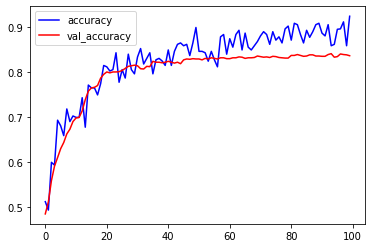

In [15]:
# Visualization of the training on the accuracy 
ax1 = last_history.accuracy.plot(color="b",label = 'accuracy')
ax1.legend()
ax2 = last_history.val_accuracy.plot(color="r", label ='val_accuracy')
ax2.legend();



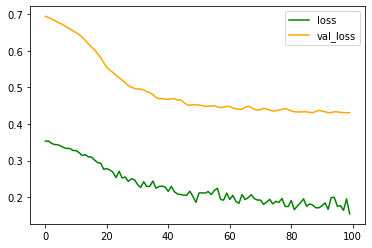

In [16]:
# Visualization of the training on the loss 
ax3 = last_history.loss.plot(color="green", label ='loss')
ax3.legend()
ax4 = last_history.val_loss.plot(color="orange", label='val_loss')
ax4.legend();

In [17]:
# Create a new model instance
new_model = build_model(embed)

# Restore the weights
new_model.load_weights('google_enc_best_weights.h5')

# Evaluate the model
loss, acc = new_model.evaluate(df.text.values, df.labels.values, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

238/238 - 30s - loss: 0.3669 - accuracy: 0.8878 - 30s/epoch - 125ms/step
Restored model, accuracy: 88.78%


In [26]:
# Best_model
last = pd.read_csv('/content/history_model3.csv')
last.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
last[last.val_accuracy == last.val_accuracy.max()]

,epoch,loss,accuracy,val_loss,val_accuracy
93,93,0.199264,0.859375,0.430959,0.84176


**Conclusion** : this model is the best one among the 3